## Data Analysis 2 - Assignment 2

Submitted by: Zariza Chowdhury (ID: 2500086)

Deadline: 23 December 2025

### Setting up
- Import relevant libraries
- Load dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

# Ignore unimportant warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the csv datasets
# Direct download links (OSF)
prices_url = "https://osf.io/p6tyr/download"
features_url = "https://osf.io/utwjs/download"

prices = pd.read_csv(prices_url)
features = pd.read_csv(features_url)

In [3]:
# Inspect the shape of the datasets
print("Features shape:", features.shape)
print("Prices shape:", prices.shape)

# Inspect the columns of each dataset
print("\nFeatures columns:", features.columns.tolist())
print("Prices columns:", prices.columns.tolist())

Features shape: (22902, 15)
Prices shape: (148021, 10)

Features columns: ['hotel_id', 'city', 'distance', 'stars', 'rating', 'country', 'city_actual', 'rating_reviewcount', 'center1label', 'center2label', 'neighbourhood', 'ratingta', 'ratingta_count', 'distance_alter', 'accommodation_type']
Prices columns: ['hotel_id', 'price', 'offer', 'offer_cat', 'year', 'month', 'weekend', 'holiday', 'nnights', 'scarce_room']


### Filtering Sample, Cleaning Messy Data

The price dataset contains multiple observations for each hotel based on different booking conditions (weekend vs weekday, no. of nights, holiday, off-season, etc)

Following the approach we used in the hotel case studies previously, I set a baseline booking condition to maintain a hotel-level unit of observation, so I can ensure comparability across hotels.

The baseline: 1 night, weekday, non-holiday

In [4]:
# Select baseline booking condition: 1 night, weekday, non-holiday
prices_baseline = prices[
    (prices["nnights"] == 1) &
    (prices["weekend"] == 0) &
    (prices["holiday"] == 0)
].copy()

# Inspect the shape of the baseline price dataset
print("Baseline price shape:", prices_baseline.shape)

# Ensure hotels are unique in the dataset
print("Unique hotels:", prices_baseline["hotel_id"].nunique())

Baseline price shape: (17223, 10)
Unique hotels: 17223


### Merge the Prices and Features Dataset

Create a combined dataset for Europe Hotels by combining the Prices and Features Dataset

In [5]:
# Merge the Prices and Features Dataset
europe = features.merge(
    prices_baseline,
    on="hotel_id",
    how="inner"
)

# Inspect the merged dataset
print("Merged shape:", europe.shape)
print("Unique hotels:", europe["hotel_id"].nunique())

# Print the first few rows
europe.head()

Merged shape: (17223, 24)
Unique hotels: 17223


,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,accommodation_type,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
0,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,114,1,15-50% offer,2017,11,0,0,1,0
1,2,Amsterdam,0.9,2.0,4.1,Netherlands,Amsterdam,372.0,City centre,Montelbaanstoren,...,Hostel,119,0,0% no offer,2017,11,0,0,1,0
2,3,Amsterdam,1.5,4.0,4.1,Netherlands,Amsterdam,165.0,City centre,Montelbaanstoren,...,Hotel,117,1,15-50% offer,2017,11,0,0,1,0
3,4,Amsterdam,1.9,3.0,3.5,Netherlands,Amsterdam,298.0,City centre,Montelbaanstoren,...,Hotel,71,1,50%-75% offer,2017,11,0,0,1,0
4,5,Amsterdam,1.8,3.5,4.0,Netherlands,Amsterdam,4.0,City centre,Montelbaanstoren,...,Hotel,690,1,15-50% offer,2017,11,0,0,1,1


### Selecting City

The assignment requires selecting a city (other than Vienna) with at least 250 hotels **after appropriate filtering of the data**.  

Hence, I selected the city after the initial filtering step that defines the unit of observation (baseline condition for booking).

But the city was selected before applying any further data cleaning steps such as removing missing values.

First, find the cities with 250+ hotels

In [6]:
# Count number of observations per city
city_counts = europe["city"].value_counts()

# Keep cities with at least 250 hotels and sort descending to show cities with most hotels first
cities_250_plus = city_counts[city_counts >= 250].sort_values(ascending=False)

# Print top 10 cities with 250+ hotels
print("Cities with at least 250 hotels:", cities_250_plus.head(10))

Cities with at least 250 hotels: city
Rome              2204
Paris             1698
Istanbul          1307
London            1118
Milan              919
Barcelona          647
St. Petersburg     623
Madrid             594
Prague             534
Berlin             521
Name: count, dtype: int64


In [7]:
# Select Paris for my analysis
city = "Paris"

paris_df = europe[europe["city"] == city].copy()

print("Selected city:", city)
print("Number of observations (before cleaning):", paris_df.shape[0])

# Print the first few rows of the city dataset
paris_df.head()

Selected city: Paris
Number of observations (before cleaning): 1698


,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,accommodation_type,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
10311,12215,Paris,7.6,4.0,3.7,France,Antony,16.0,City centre,Billancourt Station,...,Hotel,179,1,1-15% offer,2017,11,0,0,1,0
10312,12216,Paris,9.0,3.0,3.4,France,Antony,71.0,City centre,Billancourt Station,...,Hotel,113,1,15-50% offer,2017,11,0,0,1,0
10313,12217,Paris,8.9,2.0,3.2,France,Antony,70.0,City centre,Billancourt Station,...,Hotel,57,1,15-50% offer,2017,11,0,0,1,0
10314,12219,Paris,7.8,NaN,4.1,France,Antony,81.0,City centre,Billancourt Station,...,Hotel,60,1,50%-75% offer,2017,11,0,0,1,1
10315,12220,Paris,2.4,4.0,4.5,France,Paris,175.0,City centre,Billancourt Station,...,Hotel,233,1,15-50% offer,2017,11,0,0,1,1


### Data Cleaning
- Keep only relevant variables for my analysis
- Inspect missing values in relevant variables
- Drop missing values in core variables I'll use in my analysis
- Ensure correct data types

In [8]:
# Keep only relevant variables for the analysis
paris_df = paris_df[
    [
        "hotel_id",
        "city",
        "country",
        "distance",
        "stars",
        "rating",
        "price",
        "rating_reviewcount",
        "accommodation_type"
    ]
].copy()

# Pritn first few rows after selecting relevant variables
paris_df.head()

,hotel_id,city,country,distance,stars,rating,price,rating_reviewcount,accommodation_type
10311,12215,Paris,France,7.6,4.0,3.7,179,16.0,Hotel
10312,12216,Paris,France,9.0,3.0,3.4,113,71.0,Hotel
10313,12217,Paris,France,8.9,2.0,3.2,57,70.0,Hotel
10314,12219,Paris,France,7.8,NaN,4.1,60,81.0,Hotel
10315,12220,Paris,France,2.4,4.0,4.5,233,175.0,Hotel


In [9]:
# Inspect missing values in the relevant variables in the dataset
paris_df.isna().sum().sort_values(ascending=False)

stars                 257
rating                  9
rating_reviewcount      9
hotel_id                0
city                    0
country                 0
distance                0
price                   0
accommodation_type      0
dtype: int64

In [10]:
# Drop observations missing core variables
paris_df = paris_df.dropna(subset=["rating", "stars", "distance"])

# Inspect the shape after dropping missing values in core variables
print("Shape after dropping missing values in core variables:", paris_df.shape[0])

Shape after dropping missing values in core variables: 1440


In [11]:
# Inspect data types to ensure correctness
paris_df.dtypes

hotel_id                int64
city                   object
country                object
distance              float64
stars                 float64
rating                float64
price                   int64
rating_reviewcount    float64
accommodation_type     object
dtype: object

In [12]:
# Enforce numeric types for regression variables (safety check)
paris_df["distance"] = pd.to_numeric(paris_df["distance"], errors="coerce")
paris_df["stars"] = pd.to_numeric(paris_df["stars"], errors="coerce")
paris_df["rating"] = pd.to_numeric(paris_df["rating"], errors="coerce")
paris_df["price"] = pd.to_numeric(paris_df["price"], errors="coerce")

# Drop any rows that became NaN due to coercion (should be none as I already checked))
paris_df = paris_df.dropna(subset=["distance", "stars", "rating", "price"])

# Inspect data types again to confirm
print("Data types after enforcing numeric types:", paris_df.dtypes)

# Inspect the shape after enforcing numeric types
print("\nShape after enforcing numeric types:", paris_df.shape[0])

Data types after enforcing numeric types: hotel_id                int64
city                   object
country                object
distance              float64
stars                 float64
rating                float64
price                   int64
rating_reviewcount    float64
accommodation_type     object
dtype: object

Shape after enforcing numeric types: 1440


### Create the binary outcome variable

Use hotel user ratings to create a binary variable: highly_rated=1 if rating ≥ 4, 0 otherwise.

In [13]:
# Create binary dependent variable: highly_rated
paris_df["highly_rated"] = (paris_df["rating"] >= 4).astype(int)

# Inspect distribution of the binary outcome variable
paris_df["highly_rated"].value_counts()

highly_rated
1    765
0    675
Name: count, dtype: int64

### 1. Examine how high rating relates to hotel features (descriptive)

In [14]:
# Share of highly rated hotels
highly_rated_share = paris_df["highly_rated"].value_counts(normalize=True)
print("Share of highly rated hotels:\n", highly_rated_share)

# Compare means by rating status
rating_means = paris_df.groupby("highly_rated")[["distance", "stars", "price"]].mean()
print("\nMean hotel features by rating status:\n", rating_means)

Share of highly rated hotels:
 highly_rated
1    0.53125
0    0.46875
Name: proportion, dtype: float64

Mean hotel features by rating status:
               distance     stars       price
highly_rated                                
0             3.419704  2.780741  144.915556
1             2.234248  3.637908  238.216993


**Interpretation of Descriptive Results**

About 53% of hotels in Paris are classified as highly rated.    
Highly rated hotels are, on average, closer to the city centre (2.23 km vs 3.42 km), have higher star ratings, and charge higher prices than hotels that are not highly rated.

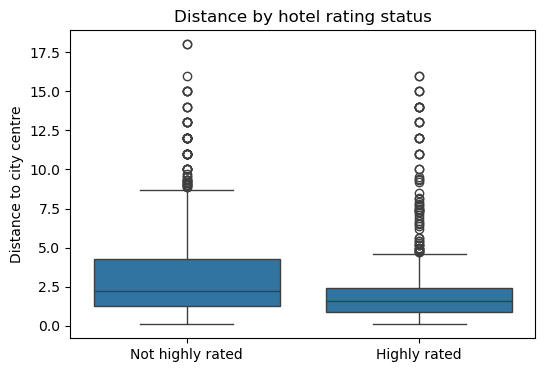

In [15]:
# Boxplot for Distance vs Rating of hotels
plt.figure(figsize=(6,4))
sns.boxplot(
    data=paris_df,
    x="highly_rated",
    y="distance"
)
plt.xticks([0,1], ["Not highly rated", "Highly rated"])
plt.xlabel("")
plt.ylabel("Distance to city centre")
plt.title("Distance by hotel rating status")
plt.show()

**Interpretation of Box Plot for Distance vs Hotel Rating**

Highly rated hotels are generally located closer to the city centre than hotels that are not highly rated.  
The median distance is lower for highly rated hotels, and their distance distribution is more concentrated near the centre.

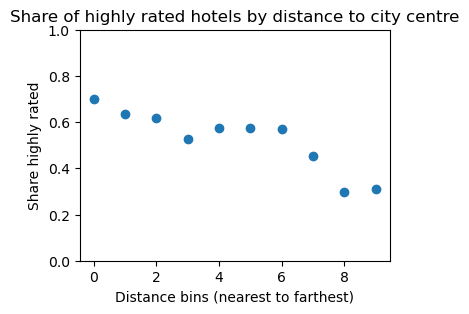

In [ ]:
# Bin Scatter Plot for Distance vs Rating of hotels

# Create distance bins (10 quantiles)
paris_df["distance_bin"] = pd.qcut(paris_df["distance"], q=10)

# Compute mean outcome by bin
bin_means = (
    paris_df
    .groupby("distance_bin")["highly_rated"]
    .mean()
    .reset_index()
)

# Plot points only (no line)
plt.figure(figsize=(4,3))
plt.scatter(range(len(bin_means)), bin_means["highly_rated"])
plt.xlabel("Distance bins (nearest to farthest)")
plt.ylabel("Share highly rated")
plt.title("Share of highly rated hotels by distance to city centre")
plt.ylim(0, 1)
plt.show()

**Interpretation of Scatter Plot for Distance Bins vs Hotel Rating**

The share of highly rated hotels declines as distance from the city centre increases.  
Hotels located closer to the centre have a substantially higher probability of being highly rated than hotels in the outer distance bins.

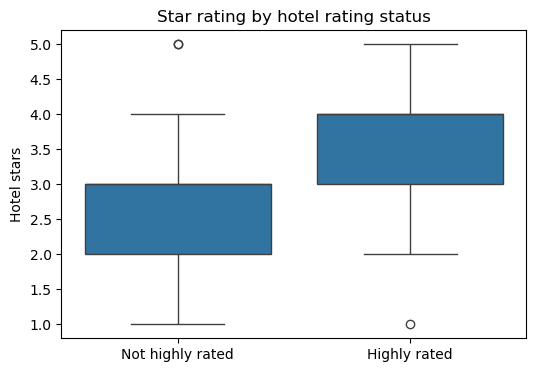

In [17]:
# Boxplots for Stars vs Rating Status of hotels
plt.figure(figsize=(6,4))
sns.boxplot(
    data=paris_df,
    x="highly_rated",
    y="stars"
)
plt.xticks([0,1], ["Not highly rated", "Highly rated"])
plt.xlabel("")
plt.ylabel("Hotel stars")
plt.title("Star rating by hotel rating status")
plt.show()

**Interpretation of Stars vs Hotel Rating**

Highly rated hotels tend to have higher star classifications than hotels that are not highly rated.  
The median and overall distribution of star ratings are clearly shifted upward for highly rated hotels.

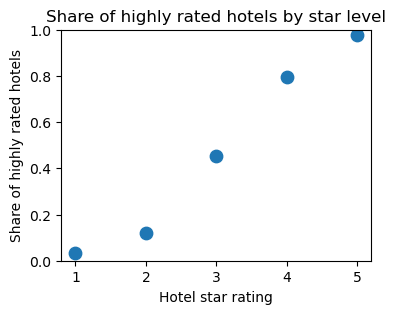

In [18]:
# Bin Scatter Plot for Stars vs Rating of hotels

# Compute share of highly rated hotels by star level
stars_share = (
    paris_df
    .groupby("stars")["highly_rated"]
    .mean()
    .reset_index()
)

# Plot the graph
plt.figure(figsize=(4,3))

plt.scatter(
    stars_share["stars"],
    stars_share["highly_rated"],
    s=80
)

plt.xlabel("Hotel star rating")
plt.ylabel("Share of highly rated hotels")
plt.title("Share of highly rated hotels by star level")

plt.ylim(0, 1)
plt.show()

**Interpretation of Scatter Plot for Star Bins**

The share of highly rated hotels increases sharply with hotel star classification.  
Higher star categories are associated with a substantially higher probability of being highly rated, indicating strong alignment between formal quality ratings and user evaluations.


### 2. Estimate the Linear Probability Model

In [19]:
# Linear Probability Model (LPM)
lpm = smf.ols(
    "highly_rated ~ distance + stars",
    data=paris_df
).fit(cov_type="HC1")  # robust SE as taught in class

print(lpm.summary())

                            OLS Regression Results                            
Dep. Variable:           highly_rated   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     497.1
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          8.23e-165
Time:                        11:57:17   Log-Likelihood:                -814.11
No. Observations:                1440   AIC:                             1634.
Df Residuals:                    1437   BIC:                             1650.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3418      0.042     -8.105      0.0

**Interpretation of Linear Probability Model**

The linear probability model shows that distance to the city centre is negatively associated with being highly rated, while hotel stars are positively associated.  
A one-kilometre increase in distance is associated with about a 2.1 percentage point lower probability of being highly rated, and an additional star is associated with roughly a 28.8 percentage point higher probability.

### 3. Estimate Logit and Probit models

In [20]:
# Logit Model
logit_model = smf.logit(
    "highly_rated ~ distance + stars",
    data=paris_df
).fit(disp=False)

print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:           highly_rated   No. Observations:                 1440
Model:                          Logit   Df Residuals:                     1437
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Dec 2025   Pseudo R-squ.:                  0.2347
Time:                        11:57:17   Log-Likelihood:                -761.75
converged:                       True   LL-Null:                       -995.32
Covariance Type:            nonrobust   LLR p-value:                3.656e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8620      0.333    -14.582      0.000      -5.515      -4.208
distance      -0.1362      0.023     -5.878      0.000      -0.182      -0.091
stars          1.6674      0.102     16.278      0.0

**Interpretation of Logit Model**

The logit model indicates that hotels located farther from the city centre have a lower likelihood of being highly rated, while hotels with more stars have a higher likelihood.  
Both distance and stars are statistically significant, and the estimated effects are consistent in sign with the linear probability model.

In [21]:
# Probit Model
probit_model = smf.probit(
    "highly_rated ~ distance + stars",
    data=paris_df
).fit(disp=False)

print(probit_model.summary())

                          Probit Regression Results                           
Dep. Variable:           highly_rated   No. Observations:                 1440
Model:                         Probit   Df Residuals:                     1437
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Dec 2025   Pseudo R-squ.:                  0.2349
Time:                        11:57:17   Log-Likelihood:                -761.52
converged:                       True   LL-Null:                       -995.32
Covariance Type:            nonrobust   LLR p-value:                2.911e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8692      0.185    -15.504      0.000      -3.232      -2.506
distance      -0.0803      0.013     -5.979      0.000      -0.107      -0.054
stars          0.9843      0.056     17.646      0.0

**Interpretation of Probit Model**

The probit model yields results consistent with the logit and linear probability models.  
Distance is negatively associated with the probability of being highly rated, while higher star ratings are positively associated, with both effects statistically significant.

In [22]:
# Marginal effects at the mean
logit_mfx = logit_model.get_margeff(at="mean")
probit_mfx = probit_model.get_margeff(at="mean")

print(logit_mfx.summary())
print(probit_mfx.summary())

        Logit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance      -0.0338      0.006     -5.870      0.000      -0.045      -0.023
stars          0.4144      0.025     16.310      0.000       0.365       0.464
       Probit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance      -0.0319      0.005     -5.975      0.000      -0.042      -0.021
stars          0.3910      0.022     17.652      0.000       0.348       0.434


**Interpretation of Marginal Effect**

Marginal effects from the logit and probit models show that a one-kilometre increase in distance reduces the probability of being highly rated by about 3–4 percentage points.  
An additional star increases the probability of being highly rated by roughly 39–41 percentage points, with similar magnitudes across both models.

### 4. Create Predicted Probabilities

In [23]:
# Create the prediction grid
distance_grid = np.linspace(
    paris_df["distance"].quantile(0.05),
    paris_df["distance"].quantile(0.95),
    60
)

stars_vals = [3, 4, 5]

pred_df = pd.DataFrame({
    "distance": np.repeat(distance_grid, len(stars_vals)),
    "stars": stars_vals * len(distance_grid)
})

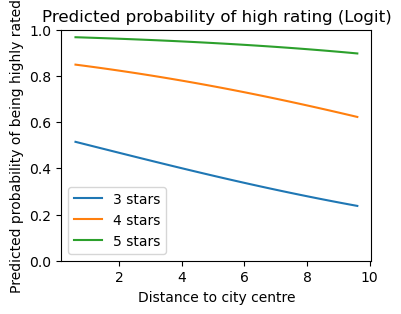

In [24]:
# Predict probabilities
pred_df["p_logit"] = logit_model.predict(pred_df)
pred_df["p_probit"] = probit_model.predict(pred_df)

pred_df.head()

# Plot predicted probabilities
plt.figure(figsize=(4,3))

for s in stars_vals:
    sub = pred_df[pred_df["stars"] == s]
    plt.plot(sub["distance"], sub["p_logit"], label=f"{s} stars")

plt.xlabel("Distance to city centre")
plt.ylabel("Predicted probability of being highly rated")
plt.title("Predicted probability of high rating (Logit)")
plt.legend()
plt.ylim(0, 1)
plt.show()

**Interpretation of Predicted Probabilities**

Predicted probabilities from the logit model decline as distance from the city centre increases for all star categories.  
At any given distance, hotels with higher star ratings have substantially higher predicted probabilities of being highly rated.

### Conclusion

This analysis examined how hotel characteristics are associated with the probability of being highly rated using hotel-level data for Paris.  
Across descriptive statistics, linear probability, logit, and probit models, hotels located closer to the city centre and with higher star classifications consistently show a higher likelihood of being highly rated.  
While the analysis is descriptive and does not establish causality, the results indicate strong and robust associations between location, formal quality ratings, and user evaluations.